Step 1: Import Required Libraries

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
    mean_squared_log_error,
)

Step 2: Load the Dataset

In [ ]:
file_path = "../dataset/processed_data.parquet"
df = pd.read_parquet(file_path, engine="pyarrow")

Step 3: Selecting relevant features for the regression model

In [ ]:
# Selecting relevant features for the regression model
features = [
    "State",
    "Model Year",
    "Make",
    "Model",
    "Electric Vehicle Type",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    "Fetched Price",
]
target = "Max Range"

X = df[features]
y = df[target]

Step 4: Encoding categorical variables and splitting the data

In [ ]:
# Encoding categorical variables and splitting the data
# Use OneHotEncoder for categorical variables and impute missing values (if any)
categorical_features = X.select_dtypes(include=["object"]).columns
numeric_features = X.select_dtypes(include=["number"]).columns

# Preprocessing pipeline for numeric and categorical features
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Step 5: Model training and evaluation pipeline

In [ ]:
# Model training and evaluation pipeline
model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=100, random_state=0)),
    ]
)

Step 6: Train/test split

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Step 7: Train the model

In [ ]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Model Year', 'Fetched Price'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['State', 'Make', 'Model', 'Electric Vehicle Type'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=0))])

Step 8: Make predictions

In [ ]:
# Make predictions
y_pred = model_pipeline.predict(X_test)

Step 9: Evaluate the Model

In [ ]:
# Evaluate the model
# 1. Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# 2. Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# 3. Root Mean Squared Error
rmse = np.sqrt(mse)
# 4. R-Squared
r2 = r2_score(y_test, y_pred)
# 5. Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 6. Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
# 7. Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test, y_pred)
# 8. Log-Cosh Loss
log_cosh_loss = np.mean(np.log(np.cosh(y_pred - y_test)))

print(f"Mean Absolute Error: {mae:.6f}")
print(f"Mean Squared Error: {mse:.6f}")
print(f"Root Mean Squared Error: {rmse:.6f}")
print(f"R-squared: {r2:.6f}")
print(f"MAPE: {mape:.6f}%")
print(f"Explained Variance: {explained_variance:.6f}")
print(f"MSLE: {msle:.6f}")
print(f"Log-Cosh Loss: {log_cosh_loss:.6f}")

Mean Absolute Error: 0.151214
Mean Squared Error: 3.927659
Root Mean Squared Error: 1.981832
R-squared: 0.999733
MAPE: 0.210432%
Explained Variance: 0.999733
MSLE: 0.000456
Log-Cosh Loss: 0.141008


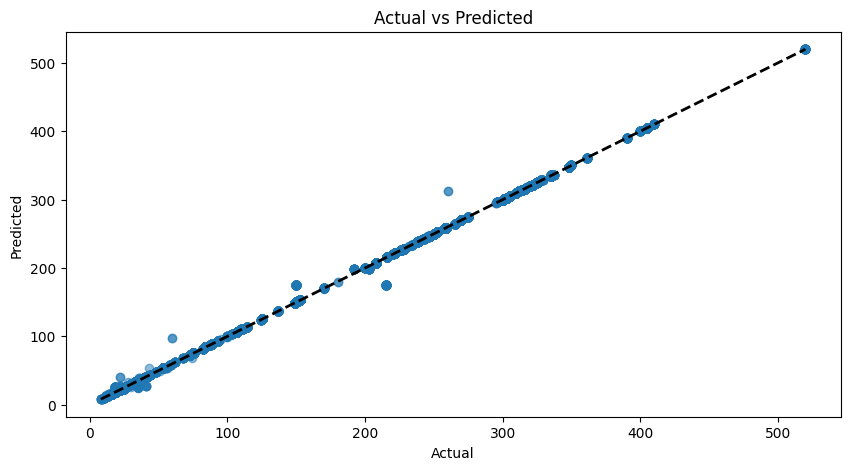

In [15]:
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()